In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import geopandas as gpd

In [85]:
gdf=gpd.read_file("../input/third/elsd/06/")

In [86]:
gdf.shape

(526, 15)

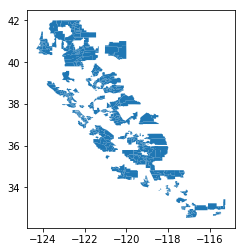

In [87]:
gdf.plot()

In [88]:
gdf.head()

STATEFP ELSDLEA    GEOID                                          NAME LSAD  \
0      06   00006  0600006        Ross Valley Elementary School District   00   
1      06   00012  0600012        Twin Ridges Elementary School District   00   
2      06   01420  0601420            Fortuna Elementary School District   00   
3      06   01427  0601427  Penn Valley Union Elementary School District   00   
4      06   01680  0601680           Ackerman Elementary School District   00   

  LOGRADE HIGRADE  MTFCC SDTYP FUNCSTAT      ALAND    AWATER     INTPTLAT  \
0      KG      08  G5400  None        E   32811470         0  +37.9937178   
1      KG      08  G5400  None        E  742887130  15743994  +39.4051970   
2      PK      08  G5400  None        E   75335396   1217543  +40.5870861   
3      KG      08  G5400  None        E  214653897   2577519  +39.1974727   
4      KG      08  G5400  None        E   11308883      7628  +38.9366318   

       INTPTLON                                           geometry  
0  -122.5927749  POLYGON ((-122.62791 38.00594299999999, -122.6...  
1  -120.7604788  POLYGON ((-121.209556 39.296266, -121.209133 3...  
2  -124.1431065  POLYGON ((-124.195942 40.613986, -124.195932 4...  
3  -121.2134059  POLYGON ((-121.279784 39.121584, -121.279759 3...  
4  -121.0507823  POLYGON ((-121.070452 38.929234, -121.070451 3...

In [89]:
gdf.LSAD.value_counts()

00    526
Name: LSAD, dtype: int64

In [28]:
gdf=gpd.read_file("../input/third/scsd/06/tl_2017_06_scsd.shp")

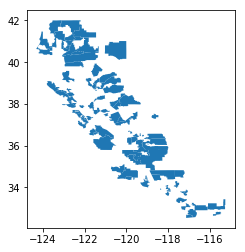

In [29]:
gdf.plot()

In [30]:
gdf.head()

STATEFP SCSDLEA    GEOID                                               NAME  \
0      06   29130  0629130                Oroville Union High School District   
1      06   06005  0606005  Scott Valley Unified School District in Forks ...   
2      06   02630  0602630                 Anaheim Union High School District   
3      06   18060  0618060        Huntington Beach Union High School District   
4      06   30250  0630250          Petaluma Joint Union High School District   

  LSAD LOGRADE HIGRADE  MTFCC SDTYP FUNCSTAT       ALAND     AWATER  \
0   00      09      12  G5410  None        E  1661910651   69733992   
1   00      07      12  G5410     A        F  1665938719    4125722   
2   00      07      12  G5410  None        E   104807900     446905   
3   00      09      12  G5410  None        E   115086955  103954163   
4   00      07      12  G5410  None        E   636425200   43431377   

      INTPTLAT      INTPTLON  \
0  +39.6041742  -121.4309121   
1  +41.2663944  -123.1705167   
2  +33.8273173  -117.9621537   
3  +33.6846338  -118.0211933   
4  +38.1985401  -122.6342942   

                                            geometry  
0  POLYGON ((-121.688772 39.523646, -121.688763 3...  
1  POLYGON ((-123.474001 41.326374, -123.467836 4...  
2  POLYGON ((-118.063322 33.831526, -118.063322 3...  
3  POLYGON ((-118.1259 33.697151, -118.125898 33....  
4  POLYGON ((-122.860766 38.199586, -122.860648 3...

In [46]:
gdf=gpd.read_file("../input/third/arealm/06/")

In [47]:
gdf.head()

STATEFP ANSICODE         AREAID  \
0      06     None  1104474288037   
1      06     None  1104474267144   
2      06     None  1104472931257   
3      06     None  1104474052133   
4      06     None    11020470669   

                                            FULLNAME  MTFCC   ALAND  AWATER  \
0                         Pacific School of Religion  K2540   27175       0   
1                     Arrowhead Regional Medical Ctr  K1231  146483       0   
2  Veterans Affairs Central California Health Car...  K1231   80369       0   
3                       Owens Valley Conservation Cp  K1237  123183   18491   
4                                               None  K2180   28013       0   

      INTPTLAT      INTPTLON PARTFLG  \
0  +37.8765183  -122.2633884       N   
1  +34.0744245  -117.3509877       N   
2  +36.7731819  -119.7792878       N   
3  +37.3889542  -118.5511306       N   
4  +37.8077370  -121.2498487       N   

                                            geometry  
0  POLYGON ((-122.264289 37.877278, -122.263975 3...  
1  POLYGON ((-117.352926 34.076557, -117.349852 3...  
2  POLYGON ((-119.781542 36.773361, -119.781538 3...  
3  POLYGON ((-118.553465 37.389665, -118.553211 3...  
4  POLYGON ((-121.250879 37.808368, -121.250467 3...

In [48]:
gdf.shape

(8455, 11)

In [49]:
gdf.MTFCC.value_counts()

K2180    4193
K2582     773
K2561     559
K2543     378
K2182     355
K2451     304
K2184     203
K2540     186
K2188     156
K2361     151
K1231     148
K1236     137
K2564     118
K2185      99
K1223      97
K1237      93
K1235      91
C3023      85
K2190      58
K2165      39
K2457      34
K1228      33
K2181      30
K2362      29
K2186      19
K1226      14
K2424      12
K1233      11
K2366      10
K1238       9
K2100       6
K2189       5
K2363       5
K1227       4
K2183       3
K2300       1
K2400       1
K1229       1
K2545       1
K2364       1
C3026       1
K1121       1
K1239       1
Name: MTFCC, dtype: int64

In [41]:
gdf=gpd.read_file("../input/third/pointlm/06/")
gdf.shape

(70844, 6)

In [42]:
gdf.head()

STATEFP ANSICODE      POINTID FULLNAME  MTFCC                       geometry
0      06     None  11018314334     None  C3061   POINT (-121.360282 37.98925)
1      06     None  11018314348     None  C3061  POINT (-121.352388 37.986291)
2      06     None  11018314356     None  C3061  POINT (-121.270612 38.046368)
3      06     None  11018314385     None  C3061  POINT (-121.356638 37.989821)
4      06     None  11018314411     None  C3061  POINT (-121.355837 37.990191)

In [45]:
gdf.MTFCC.value_counts()

C3061    54363
C3022     5930
K2543     3545
C3081     3303
K2165     1198
K2193      530
K2195      298
K1231      292
K2190      199
K2451      174
K2194      142
K2191      126
K2452      119
K2196      117
K3544       94
K2561       69
K2454       68
K1236       45
K2110       38
K1225       35
K2453       30
C3071       23
K2582       22
K2400       19
K2184       14
K1237       12
C3062       10
K2182        7
K1239        6
K2185        5
K2545        3
K2460        2
C3078        2
K2146        2
K2188        1
C3075        1
Name: MTFCC, dtype: int64

In [71]:
gdf=gpd.read_file("../input/third/place/39/")
gdf.shape

(1215, 17)

In [72]:
gdf.head()

STATEFP PLACEFP   PLACENS    GEOID        NAME            NAMELSAD LSAD  \
0      39   51058  01086832  3951058    Mogadore    Mogadore village   47   
1      39   12280  02397564  3912280  Carrollton  Carrollton village   47   
2      39   21560  02398709  3921560     Dellroy     Dellroy village   47   
3      39   42518  02398412  3942518   Leesville   Leesville village   47   
4      39   46998  02399235  3946998     Malvern     Malvern village   47   

  CLASSFP PCICBSA PCINECTA  MTFCC FUNCSTAT    ALAND  AWATER     INTPTLAT  \
0      C2       N        N  G4110        A  5423973   51531  +41.0524772   
1      C1       N        N  G4110        A  6374704       0  +40.5803617   
2      C1       N        N  G4110        A   465665   83513  +40.5552266   
3      C1       N        N  G4110        A   664991       0  +40.4520565   
4      C1       N        N  G4110        A  1759192       0  +40.6896526   

       INTPTLON                                           geometry  
0  -081.4074420  POLYGON ((-81.41690199999999 41.048695, -81.41...  
1  -081.0900492  POLYGON ((-81.111447 40.573771, -81.1114439999...  
2  -081.1994046  POLYGON ((-81.203459 40.553951, -81.203457 40....  
3  -081.2095804  POLYGON ((-81.21714999999999 40.452089, -81.21...  
4  -081.1815436  POLYGON ((-81.19333499999999 40.690288, -81.19...

In [81]:
gdfxy=gdf[['INTPTLON','INTPTLAT']].astype(np.float).values

In [82]:
gdfxy

array([[-81.407442 ,  41.0524772],
       [-81.0900492,  40.5803617],
       [-81.1994046,  40.5552266],
       ...,
       [-84.2807695,  39.0627903],
       [-80.780797 ,  40.0688558],
       [-84.0484   ,  39.8229708]])

In [73]:
gdf[gdf.MTFCC=='G4210']

STATEFP PLACEFP   PLACENS    GEOID                  NAME  \
931       39   01588  02628857  3901588             Alvordton   
932       39   02022  02584360  3902022         Andersonville   
933       39   02266  02628858  3902266          Apple Valley   
934       39   02848  02628859  3902848               Atwater   
935       39   03142  02628860  3903142            Austinburg   
936       39   03184  02393324  3903184            Austintown   
937       39   03585  02393325  3903585            Bainbridge   
938       39   03716  02393326  3903716             Ballville   
939       39   03786  02628861  3903786               Bannock   
940       39   04094  02628862  3904094                Bascom   
941       39   04840  02393331  3904840         Beckett Ridge   
942       39   05013  02393334  3905013      Beechwood Trails   
943       39   05676  02628863  3905676           Bentonville   
944       39   05816  02628864  3905816                Berlin   
945       39   06208  02628865  3906208          Beulah Beach   
946       39   06670  02393339  3906670     Blacklick Estates   
947       39   06740  02628866  3906740           Bladensburg   
948       39   07377  02585500  3907377              Blue Jay   
949       39   07454  02393341  3907454              Boardman   
950       39   07583  02393343  3907583             Bolindale   
951       39   07888  02628867  3907888           Bourneville   
952       39   08378  02585501  3908378                Brecon   
953       39   08602  02585502  3908602            Bridgetown   
954       39   08812  02393349  3908812             Brilliant   
955       39   08826  02393350  3908826             Brimfield   
956       39   09200  02393351  3909200     Brookfield Center   
957       39   09596  02628868  3909596           Brownsville   
958       39   10128  02628869  3910128               Buffalo   
959       39   10156  02628870  3910156                Buford   
960       39   10352  02393357  3910352            Burlington   
...      ...     ...       ...      ...                   ...   
1185      39   76666  02628977  3976666             Thornport   
1186      39   76890  02628978  3976890            Tippecanoe   
1187      39   77434  02628979  3977434               Trinway   
1188      39   77812  02628980  3977812        Tuppers Plains   
1189      39   77840  02393259  3977840          Turpin Hills   
1190      39   78078  02633188  3978078     Twinsburg Heights   
1191      39   78736  02393262  3978736             Uniontown   
1192      39   78848  02785017  3978848             Uniopolis   
1193      39   79184  02628981  3979184           Valley City   
1194      39   79590  02628982  3979590          Vaughnsville   
1195      39   79982  02584369  3979982               Vickery   
1196      39   80066  02393832  3980066         Vienna Center   
1197      39   80150  02628983  3980150               Vincent   
1198      39   80612  02628984  3980612          Walnut Creek   
1199      39   81760  02628985  3981760             Waterford   
1200      39   83541  02393842  3983541             West Hill   
1201      39   83930  02628986  3983930           Westminster   
1202      39   84140  02393845  3984140       West Portsmouth   
1203      39   84528  02393847  3984528          Wetherington   
1204      39   84588  02393849  3984588          Wheelersburg   
1205      39   84812  02393852  3984812             White Oak   
1206      39   84882  02584370  3984882        Whites Landing   
1207      39   85085  02584371  3985085       Wightmans Grove   
1208      39   85092  02393859  3985092           Wilberforce   
1209      39   85344  02584372  3985344          Williamsdale   
1210      39   85442  02628987  3985442             Williston   
1211      39   86072  02628988  3986072             Winesburg   
1212      39   86254  02393863  3986254          Withamsville   
1213      39   86282  02628989  3986282             Wolfhurst   
1214      39   86660  02393869  3986660 

In [74]:
gdf['surfix']=gdf['NAMELSAD'].map(lambda u: u.split(" ")[-1])

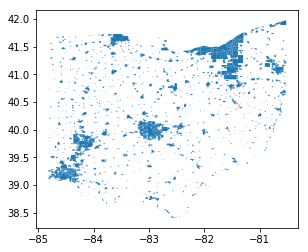

In [75]:
gdf.plot()

In [64]:
gdf.MTFCC.value_counts()

G4110    944
G4210     64
Name: MTFCC, dtype: int64

In [83]:
gdf.surfix.value_counts()

village    684
CDP        284
city       247
Name: surfix, dtype: int64

In [84]:
gdf.LSAD.value_counts()

47    684
57    284
25    247
Name: LSAD, dtype: int64